In [24]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load dataset, more than one sheet in a file
df1 = pd.read_excel("Bank_Churn_Messy.xlsx", sheet_name = 0)
df2 = pd.read_excel("Bank_Churn_Messy.xlsx", sheet_name = 1)

df = pd.merge(df1 , df2, on=["CustomerId", "Tenure"])

df.head(20)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,Yes,0
6,15574012,Chu,645,Spain,Male,44.0,8,€149756.71,€113755.78,2,No,No,1
7,15592531,Bartlett,822,France,Male,50.0,7,€10062.8,€0.0,2,Yes,Yes,0
8,15656148,Obinna,376,Germany,Female,29.0,4,€119346.88,€115046.74,4,No,No,1
9,15792365,He,501,French,Male,44.0,4,€74940.5,€142051.07,2,Yes,Yes,0


In [3]:
#inspect the datasest
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure           10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  IsActiveMember   10004 non-null  object 
 12  Exited           10004 non-null  int64  
dtypes: float64(1), int64(5), object(7)
memory usage: 1016.2+ KB


In [4]:
# check  file missing values
df.isnull().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure             0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
dtype: int64

In [5]:
#check for duplicates
duplicated = df.duplicated().sum()
print(duplicated)

4


In [6]:
# handle missing value
df.dropna(inplace=True)
df.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
dtype: int64

In [7]:
# handle duplicated values
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe(include="all")

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
count,9.997000e+03,9997,9997.000000,9997,9997,9997.000000,9997.000000,9997,9997,9997.000000,9997,9997,9997.000000
unique,NaN,2932,NaN,5,2,NaN,NaN,9996,6380,NaN,2,2,NaN
top,NaN,Smith,NaN,Germany,Male,NaN,NaN,€24924.92,€0.0,NaN,Yes,Yes,NaN
freq,NaN,32,NaN,2508,5456,NaN,NaN,2,3616,NaN,5149,5149,NaN
mean,1.569094e+07,NaN,650.545364,NaN,NaN,38.922077,5.013204,NaN,NaN,1.530359,NaN,NaN,0.203761
std,7.193443e+04,NaN,96.657932,NaN,NaN,10.489072,2.892364,NaN,NaN,0.581669,NaN,NaN,0.402814
min,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,NaN,NaN,1.000000,NaN,NaN,0.000000
25%,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,NaN,NaN,1.000000,NaN,NaN,0.000000
50%,1.569073e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,NaN,NaN,1.000000,NaN,NaN,0.000000
75%,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,NaN,NaN,2.000000,NaN,NaN,0.000000


In [9]:
df.head(20)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,€79084.1,€125510.82,1,Yes,Yes,0
6,15574012,Chu,645,Spain,Male,44.0,8,€149756.71,€113755.78,2,No,No,1
7,15592531,Bartlett,822,France,Male,50.0,7,€10062.8,€0.0,2,Yes,Yes,0
8,15656148,Obinna,376,Germany,Female,29.0,4,€119346.88,€115046.74,4,No,No,1
9,15792365,He,501,French,Male,44.0,4,€74940.5,€142051.07,2,Yes,Yes,0
10,15592389,H?,684,France,Male,27.0,2,€71725.73,€134603.88,1,Yes,Yes,0


In [10]:
df["Geography"].unique()

array(['FRA', 'Spain', 'French', 'France', 'Germany'], dtype=object)

In [11]:
df["Geography"].replace({
    "FRA": "France",
    "French": "France"
}, inplace=True)

df["Geography"].unique()

C:\Users\USER\AppData\Local\Temp\ipykernel_10440\3315793429.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Geography"].replace({


array(['France', 'Spain', 'Germany'], dtype=object)

In [12]:
def clean_currency(x):
    if  isinstance(x, str):
        return float(x.replace("€", ""))
    return x
    
df["EstimatedSalary"] = df ["EstimatedSalary"].apply(clean_currency)
df["Balance"] = df["Balance"].apply(clean_currency)
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0
3,15619304,Onio,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1
4,15701354,Boni,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0


In [13]:
# # convert the exited column with (1 - yes, 0 - NO)
# df["Exited"] = df["Exited"].replace({0: "No", 1: "Yes"})
# df.head()

In [14]:
# select customer with high credit score
high_customer_credit_score = df[df["CreditScore"] >= 700]
high_customer_credit_score

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
5,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0
7,15592531,Bartlett,822,France,Male,50.0,7,10062.80,0.00,2,Yes,Yes,0
20,15568982,Hao,726,France,Female,24.0,6,54724.03,0.00,2,Yes,Yes,0
21,15577657,McDonald,732,France,Male,41.0,8,170886.17,0.00,2,Yes,Yes,0
25,15625047,Yen,846,France,Female,38.0,5,187616.16,0.00,1,Yes,Yes,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15719294,Wood,800,France,Female,29.0,2,167773.55,0.00,2,No,No,0
9996,15606229,Obijiaku,771,France,Male,39.0,5,96270.64,0.00,2,No,No,0
9998,15584532,Liu,709,France,Female,36.0,7,42085.58,0.00,1,Yes,Yes,1
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,92888.52,75075.31,2,No,No,1


In [15]:
# find the active customer in germany
active_customer_in_germany = df[(df["Geography"] == "Germany") & (df["IsActiveMember"] == "Yes")]
active_customer_in_germany

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
16,15643966,Goforth,616,Germany,Male,45.0,3,64327.26,143129.41,2,Yes,Yes,0
27,15736816,Young,756,Germany,Male,36.0,2,170041.95,136815.64,1,Yes,Yes,0
40,15585768,Cameron,582,Germany,Male,41.0,6,178074.04,70349.48,2,Yes,Yes,0
46,15754849,Tyler,776,Germany,Female,32.0,4,126517.46,109421.13,2,Yes,Yes,0
47,15602280,Martin,829,Germany,Female,27.0,9,119708.21,112045.67,1,Yes,Yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9951,15638494,Salinas,625,Germany,Female,39.0,10,96444.88,129845.26,1,Yes,Yes,0
9961,15681026,Lucciano,795,Germany,Female,33.0,9,120853.83,104552.72,1,Yes,Yes,1
9982,15672754,Burbidge,498,Germany,Male,42.0,3,53445.17,152039.70,1,Yes,Yes,1
9985,15696175,Echezonachukwu,602,Germany,Male,35.0,7,51695.41,90602.42,2,Yes,Yes,0


In [16]:
churned_customer = df[df["Exited"] == "Yes"]
churned_customer

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited


In [17]:
# create a custom column CALLED "Servicerating"
np.random.seed(42)
ratings = pd.DataFrame({ "CustomerId": df["CustomerId"],
    "ServiceRating": np.random.randint(1, 6, len(df["CustomerId"].unique()))
})
    
df = df.merge(ratings, on="CustomerId", how="left")
df

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,ServiceRating
0,15634602,Hargrave,619,France,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1,4
1,15647311,Hill,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0,5
2,15619304,Onio,502,France,Female,42.0,8,113931.57,159660.80,3,No,No,1,3
3,15701354,Boni,699,France,Female,39.0,1,93826.63,0.00,2,No,No,0,5
4,15737888,Mitchell,850,Spain,Female,43.0,2,79084.10,125510.82,1,Yes,Yes,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,15606229,Obijiaku,771,France,Male,39.0,5,96270.64,0.00,2,No,No,0,2
9993,15569892,Johnstone,516,France,Male,35.0,10,101699.77,57369.61,1,Yes,Yes,0,4
9994,15584532,Liu,709,France,Female,36.0,7,42085.58,0.00,1,Yes,Yes,1,3
9995,15682355,Sabbatini,772,Germany,Male,42.0,3,92888.52,75075.31,2,No,No,1,2


In [18]:
avr_credit_score = df.groupby("Geography")["CreditScore"].mean()
avr_credit_score

Geography
France     649.690604
Germany    651.484450
Spain      651.324717
Name: CreditScore, dtype: float64

In [19]:
# churned rate by gender
churned_rate = df.groupby("Gender")["Exited"].mean() * 100
churned_rate

Gender
Female    25.082581
Male      16.458944
Name: Exited, dtype: float64

In [26]:
# churned rate by geography
geo_churned_rate = df.groupby("Geography")["Exited"].sum() * 100
geo_churned_rate

Geography
France     81000
Germany    81400
Spain      41300
Name: Exited, dtype: int64

In [21]:
# aggregation
multiple_churned_rate = df.groupby("Geography").agg({
    "Age": "mean",
    "EstimatedSalary": "mean",
    "Balance": "mean"
})

multiple_churned_rate

,Age,EstimatedSalary,Balance
Geography,,,
France,38.513066,99903.124289,62105.022839
Germany,39.770335,101113.804322,119721.495993
Spain,38.890953,99440.293453,61794.571321


In [22]:
# check customer by tenure
tenure = df.groupby("Tenure")["CustomerId"].count().sort_values(ascending=False)
tenure

Tenure
2     1047
1     1035
7     1028
8     1025
5     1012
3     1008
4      989
9      984
6      966
10     490
0      413
Name: CustomerId, dtype: int64

In [23]:
# check customer churn rate
churn_values = df["Exited"].value_counts()
churn_values

Exited
0    7960
1    2037
Name: count, dtype: int64

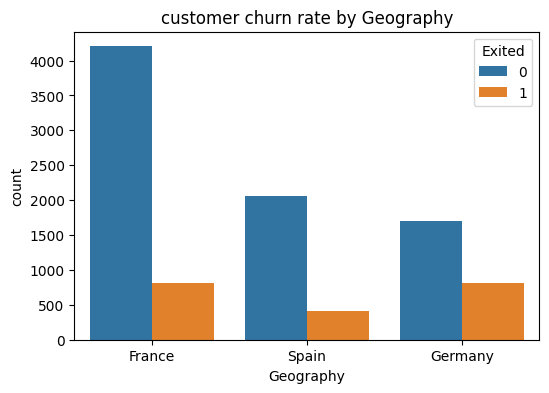

In [27]:
# create customer churn rate by geography
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Geography", hue= "Exited")
plt.title("Customer churn rate by Geography")
plt.show()


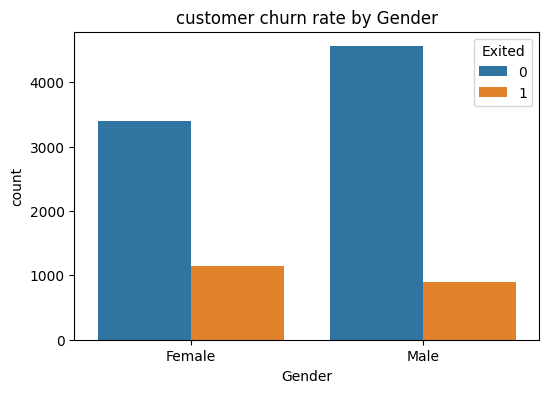

In [28]:
# create customer churn rate by Gender
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Gender", hue= "Exited")
plt.title("Customer churn rate by Gender")
plt.show()

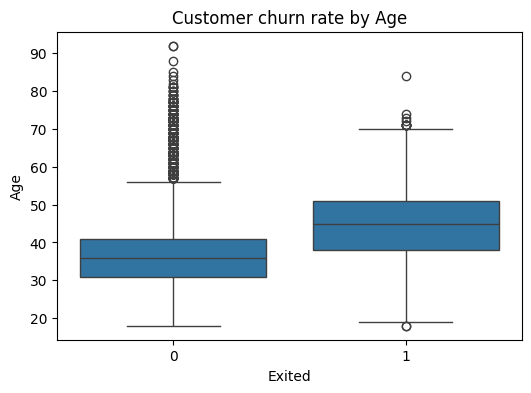

In [30]:
# create customer churn rate by geography
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="Exited", y="Age")
plt.title("Customer churn rate by Age")
plt.show()

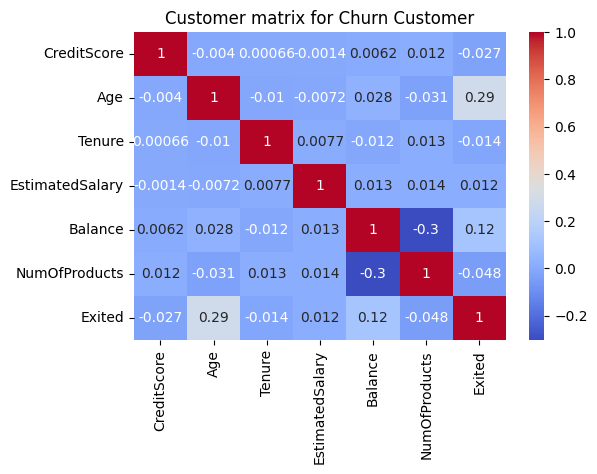

In [41]:
corr = df[["CreditScore", "Age", "Tenure", "EstimatedSalary", "Balance", "NumOfProducts", "Exited"]].corr()
plt.figure(figsize=(6,4))
sns.heatmap(data=corr, annot=True, cmap="coolwarm")
plt.title("Customer matrix for Churn Customer")
plt.show()